In [1]:
from translate import translate
from sentiment_analysis import preprocess, predict_sentiment
import pandas as pd
import csv
from tqdm import tqdm

c:\Users\guyu8\anaconda3\envs\keio_thesis_translate\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\guyu8\anaconda3\envs\keio_thesis_translate\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [2]:
all_tweets = pd.read_excel('d:/卒論/data/TWEETS/tweets_info_combined.xlsx')

In [22]:
all_tweets[50550:50551]

,Number,Username,content,Create_time,Retweet_count,Likes,Station
50550,506,Bar PSY,BLANK,Sun Dec 29 04:11:39 +0000 2024,1,1,恵比寿駅


In [5]:
results = []

for _, tweet in tqdm(all_tweets[50550:].iterrows(), total = len(all_tweets[50550:]), desc = "Analysis Progress"):
    original = list(tweet)
    comment = tweet['content']
    comment_preprocessed = preprocess(comment)
    # comment_preprocessed = translate(comment_preprocessed)
    sentiment = predict_sentiment(comment_preprocessed)    
    score = {'neutral': 0, 'positive': 1}.get(sentiment, -1)

    original.extend([sentiment, score])
    results.append(original)

header = list(all_tweets.columns) + ["sentiment", "sentiment_score"]
with open(f'D:/卒論/data/sentiment_results.csv', 'w', newline='', encoding='utf-8-sig') as file:
    csv_writer = csv.writer(file)
    csv_writer.writerow(header)  
    csv_writer.writerows(results)  

print("saved successfully!")

Analysis Progress: 100%|██████████| 135123/135123 [5:25:21<00:00,  6.92it/s]  


saved successfully!


In [ ]:
all_tweets[50550:]

,Number,Username,content,Create_time,Retweet_count,Likes,Station
50550,506,Bar PSY,NaN,Sun Dec 29 04:11:39 +0000 2024,1,1,恵比寿駅


In [12]:
header = list(all_tweets.columns) + ["sentiment", "sentiment_score"]
with open(f'D:/卒論/data/sentiment_results.csv', 'w', newline='', encoding='utf-8-sig') as file:
    csv_writer = csv.writer(file)
    csv_writer.writerow(header)  
    csv_writer.writerows(results)  

print("saved successfully!")

saved successfully!


In [8]:
sentiment = pd.read_csv("d:/卒論/data/sentiment_results _XLM.csv")

In [10]:
import numpy as np


sentiment['weight'] = 0.5*np.log(np.e + sentiment['Likes']) + 0.5*np.log(np.e + sentiment['Retweet_count'])
sentiment['SS'] = sentiment['sentiment_score'] * sentiment['weight']

sentiment.to_excel('d:/卒論/data/sentiment_with_weights_XLM.xlsx')


In [31]:
stn = sentiment['Station'].unique()
SSA = {}
for station in stn:

    SSA[station] = sentiment.loc[sentiment['Station'] == station, 'SS'].sum()


In [9]:
sentiment['sentiment_score']

0         2
1         3
2         2
3         3
4         3
         ..
185668    2
185669    3
185670    1
185671    2
185672    2
Name: sentiment_score, Length: 185673, dtype: int64

## Analysis

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
data = pd.read_csv('d:/卒論/data/R_input.csv')

In [43]:
dummy_columns = [col for col in data.columns if col.endswith('_dummy')]

In [60]:
city_price = {}
city_capacity = {}
city_area = {}
city_stn = {}
for city in dummy_columns:
    city_price[city] = data[data[city] == 1]['PRICE(10000)']
    city_capacity[city] = data[data[city] == 1]['CAPACITY']
    city_area[city] = data[data[city] == 1]['AREA']
    city_stn[city] = data[data[city] == 1]['stn_count']
    

    

In [61]:
# data_long = pd.DataFrame([
#     {'Category': key, 'Value': value} 
#     for key, values in city_price.items() 
#     for value in values
# ])

values = [v for v in city_price.values()]  # List of value lists
categories = list(city_price.keys())  # List of category names

capacity_values = [v for v in city_capacity.values()]
capacity_categories = categories = list(city_capacity.keys())

area_values = [v for v in city_area.values()]
area_categories = categories = list(city_area.keys())

stn_values = [v for v in city_stn.values()]
stn_categories = categories = list(city_stn.keys())

C:\Users\guyu8\AppData\Local\Temp\ipykernel_33064\4186739001.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(values, labels=categories)


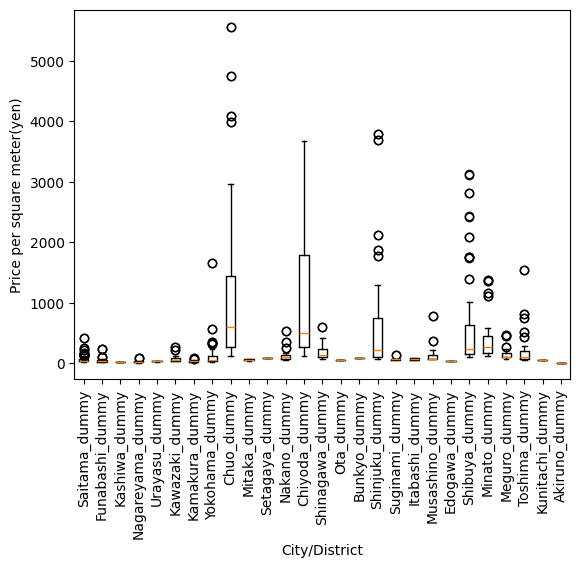

In [50]:
plt.boxplot(values, labels=categories)
plt.xticks(rotation=90)
plt.xlabel("City/District")
plt.ylabel("Price per square meter(yen)")
plt.show()

C:\Users\guyu8\AppData\Local\Temp\ipykernel_33064\345730086.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(capacity_values, labels=capacity_categories)


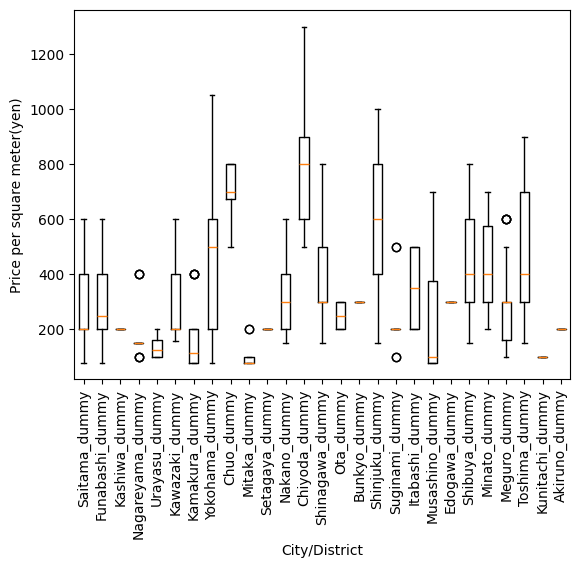

In [ ]:
plt.boxplot(capacity_values, labels=capacity_categories)
plt.xticks(rotation=90)
plt.xlabel("City/District")
plt.ylabel("Capacity")
plt.show()

C:\Users\guyu8\AppData\Local\Temp\ipykernel_33064\950748857.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(area_values, labels=area_categories)


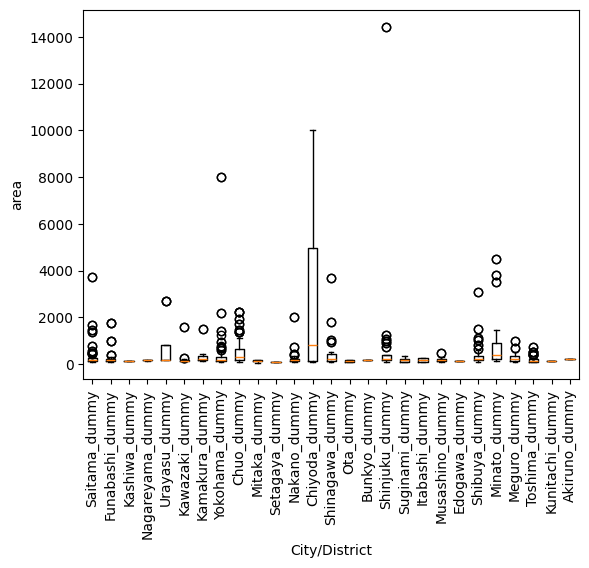

In [59]:
plt.boxplot(area_values, labels=area_categories)
plt.xticks(rotation=90)
plt.xlabel("City/District")
plt.ylabel("area")
plt.show()

C:\Users\guyu8\AppData\Local\Temp\ipykernel_33064\435611442.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(stn_values, labels=stn_categories)


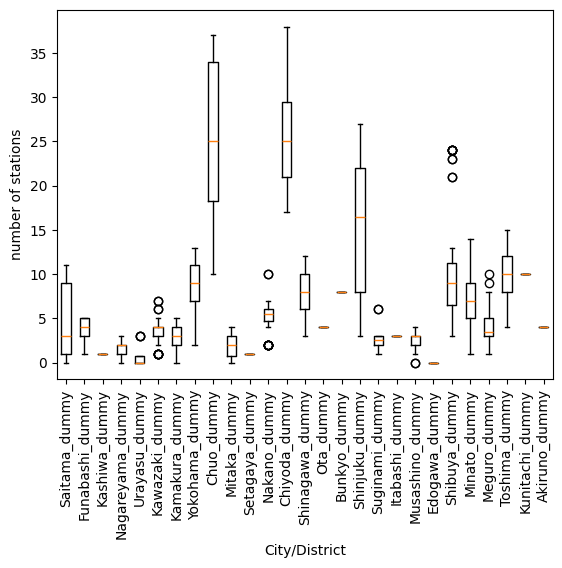

In [62]:
plt.boxplot(stn_values, labels=stn_categories)
plt.xticks(rotation=90)
plt.xlabel("City/District")
plt.ylabel("number of stations")
plt.show()

In [ ]:
sns.boxplot(x='Category', y='Value', data=df)